In [46]:
import cv2
import matplotlib.pyplot as plt

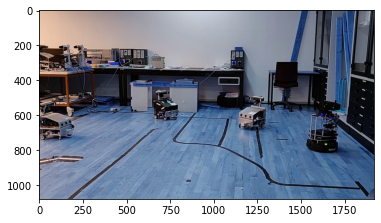

In [47]:
cap = cv2.VideoCapture('Robots.mp4')
ret, frame1 = cap.read()
ret, frame2 = cap.read()
if ret: plt.imshow(frame1)

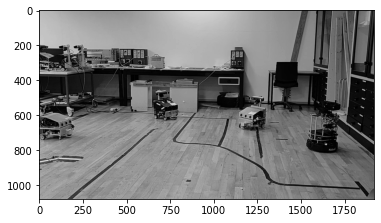

In [18]:
gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
plt.imshow(gray1, cmap='gray')

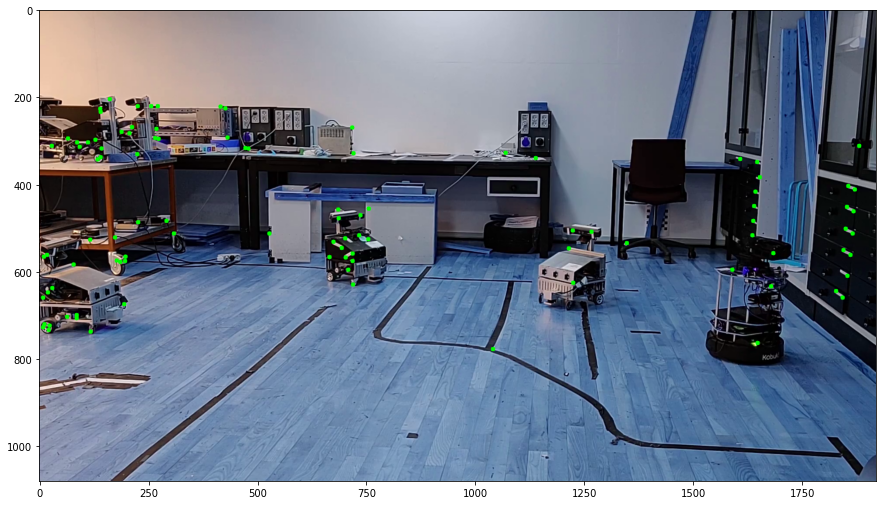

In [20]:
feat1 = cv2.goodFeaturesToTrack(gray1, maxCorners=100, qualityLevel=0.3, minDistance=7)
feat2, status, error = cv2.calcOpticalFlowPyrLK(gray1, gray2, feat1, None)
for i in range(len(feat1)):
    f10=int(feat1[i][0][0])
    f11=int(feat1[i][0][1])
    f20=int(feat2[i][0][0])
    f21=int(feat2[i][0][1])
    cv2.line(frame2, (f10,f11), (f20, f21), (0, 255, 0), 2)
    cv2.circle(frame2, (f10, f11), 5, (0, 255, 0), -1)

plt.figure(figsize=(15,15))
plt.imshow(frame2)

In [31]:
flow = cv2.calcOpticalFlowFarneback(gray1, gray2, None, 0.5, 3, 15, 3, 5, 1.5, 0)
mag, ang = cv2.cartToPolar(flow[:,:,0], flow[:,:,1]) # Retrieving the magnitude and angle of every pixel
x = flow[:,:,0]
y = flow[:,:,1]

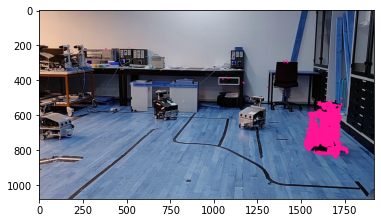

In [40]:
mask = mag > 1
frame1[mask] = [255,20,147]
# frame1.shape
plt.imshow(frame1)

In [42]:
print(cv2.__version__)

4.5.5


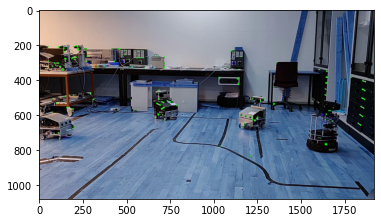

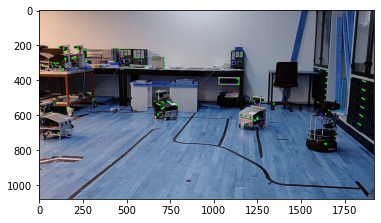

In [48]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

cap = cv2.VideoCapture('Robots.mp4')
ret, frame1 = cap.read()
ret, frame2 = cap.read()
if ret: plt.imshow(frame1)

# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp1 = orb.detect(frame1,None)
# compute the descriptors with ORB
kp1, des1 = orb.compute(frame1, kp1)
# draw only keypoints location,not size and orientation
img1 = cv.drawKeypoints(frame1, kp1, None, color=(0,255,0), flags=0)
plt.figure(1)
plt.imshow(img1)
# find the keypoints with ORB
kp2 = orb.detect(frame2,None)
# compute the descriptors with ORB
kp2, des2 = orb.compute(frame2, kp2)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(frame2, kp2, None, color=(0,255,0), flags=0)
plt.figure(2)
plt.imshow(img2)

# TODO: finish